# **Project**: Explanatory Data Analysis & Data Presentation (Movies Dataset)

## Data Import and first Inspection

1. __Import__ the movies dataset from the CSV file "movies_complete.csv". __Inspect__ the data.

In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda cell: '{:.2f}'.format(cell))
pd.set_option('display.max_colwidth', 30)
pd.set_option('display.max_columns', None)
from IPython.display import HTML

In [167]:
class Data:
    def __init__(self, filename):
        self.data= pd.read_csv(filename, parse_dates= ['release_date'])
        self.preprocessed_data = self.data_preprocessing(self.data).set_index('title')
        
    
    @staticmethod
    def data_preprocessing(data):
        df = data.copy()
        
        df['profit_musd'] = df['revenue_musd'] - df['budget_musd']
        df['return'] = df['revenue_musd'] / df['budget_musd']
        df.rename(columns = {'poster_path': 'poster'}, inplace = True)
        vote_count_mean = df['vote_count'] > df.quantile(.1)['vote_count']
        budget_filter = df['budget_musd'] > 1
        df = df[vote_count_mean & budget_filter].drop(columns = 'overview')
        df['stand_alone_or_franchise'] = np.where(df['belongs_to_collection'].isnull()
                                           , 'stand_alone', 'franchise')
        return df
    
    @property
    def missing_values_visualization(self):
        fig, axes = plt.subplots(figsize = (15, 5))
        sns.heatmap(self.preprocessed_data.isna(), ax= axes, 
                    cmap = 'viridis', cbar = False, yticklabels= False)
        
        

<class 'pandas.core.frame.DataFrame'>
Index: 7128 entries, Toy Story to Pro Lyuboff
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        7128 non-null   int64         
 1   tagline                   5632 non-null   object        
 2   release_date              7128 non-null   datetime64[ns]
 3   genres                    7111 non-null   object        
 4   belongs_to_collection     1429 non-null   object        
 5   original_language         7128 non-null   object        
 6   budget_musd               7128 non-null   float64       
 7   revenue_musd              4903 non-null   float64       
 8   production_companies      6807 non-null   object        
 9   production_countries      7025 non-null   object        
 10  vote_count                7128 non-null   float64       
 11  vote_average              7128 non-null   float64       
 12  popularity

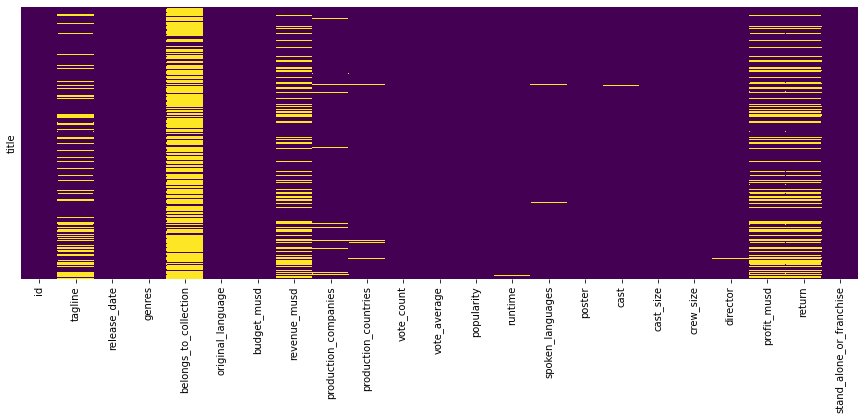

In [168]:
data = Data(filename= 'movies_complete.csv')
movie = data.preprocessed_data
movie.info()
data.missing_values_visualization

__Some additional information on Features/Columns__:

* **id:** The ID of the movie (clear/unique identifier).
* **title:** The Official Title of the movie.
* **tagline:** The tagline of the movie.
* **release_date:** Theatrical Release Date of the movie.
* **genres:** Genres associated with the movie.
* **belongs_to_collection:** Gives information on the movie series/franchise the particular film belongs to.
* **original_language:** The language in which the movie was originally shot in.
* **budget_musd:** The budget of the movie in million dollars.
* **revenue_musd:** The total revenue of the movie in million dollars.
* **production_companies:** Production companies involved with the making of the movie.
* **production_countries:** Countries where the movie was shot/produced in.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **vote_average:** The average rating of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **runtime:** The runtime of the movie in minutes.
* **overview:** A brief blurb of the movie.
* **spoken_languages:** Spoken languages in the film.
* **poster_path:** The URL of the poster image.
* **cast:** (Main) Actors appearing in the movie.
* **cast_size:** number of Actors appearing in the movie.
* **director:** Director of the movie.
* **crew_size:** Size of the film crew (incl. director, excl. actors).

## The best and the worst movies...

2. __Filter__ the Dataset and __find the best/worst n Movies__ with the

- Highest Revenue
- Highest Budget
- Highest Profit (=Revenue - Budget)
- Lowest Profit (=Revenue - Budget)
- Highest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10) 
- Lowest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10)
- Highest number of Votes
- Highest Rating (only movies with 10 or more Ratings)
- Lowest Rating (only movies with 10 or more Ratings)
- Highest Popularity

__Define__ an appropriate __user-defined function__ to reuse code.

In [169]:
def movie_filter(data,criteria, n= 5, mode = 'best'):
    df = data.copy()
    if mode == 'best':
        return HTML(df.nlargest(n, columns = criteria)[['poster',criteria]].to_html(escape = False))
    if mode == 'worst':
        return HTML(df.nsmallest(n, columns = criteria)[['poster',criteria]].to_html(escape = False))
    
    
    
    

__Movies Top 5 - Highest Revenue__

In [170]:
movie_filter(data= movie, criteria= 'revenue_musd', n = 5)

,poster,revenue_musd
title,,
Avatar,,2787.97
Star Wars: The Force Awakens,,2068.22
Titanic,,1845.03
The Avengers,,1519.56
Jurassic World,,1513.53


__Movies Top 5 - Highest Budget__

In [171]:
movie_filter(data= movie, criteria= 'budget_musd', n= 5)

,poster,budget_musd
title,,
Pirates of the Caribbean: On Stranger Tides,,380.00
Pirates of the Caribbean: At World's End,,300.00
Avengers: Age of Ultron,,280.00
Superman Returns,,270.00
Tangled,,260.00


__Movies Top 5 - Highest Profit__

In [172]:
movie_filter(data= movie, criteria= 'profit_musd', n= 5)

,poster,profit_musd
title,,
Avatar,,2550.97
Star Wars: The Force Awakens,,1823.22
Titanic,,1645.03
Jurassic World,,1363.53
Furious 7,,1316.25


__Movies Top 5 - Lowest Profit__

In [173]:
movie_filter(data= movie, criteria= 'profit_musd', n= 5, mode= 'worst')

,poster,profit_musd
title,,
The Lone Ranger,,-165.71
The Alamo,,-119.18
Mars Needs Moms,,-111.01
Valerian and the City of a Thousand Planets,,-107.45
The 13th Warrior,,-98.30


__Movies Top 5 - Highest ROI (Return on Investment)__

In [174]:
movie_filter(data= movie, criteria= 'return', n =5)

,poster,return
title,,
Alice in Wonderland,,190.67
Snow White and the Seven Dwarfs,,124.24
Gone with the Wind,,100.04
Lost in Thailand,,94.55
The Rocky Horror Picture Show,,94.08


__Movies Top 5 - Lowest ROI__

In [175]:
movie_filter(data= movie, criteria= 'return', n = 5, mode = 'worst')

,poster,return
title,,
Chasing Liberty,,0.00
The Cookout,,0.00
Never Talk to Strangers,,0.00
To Rob a Thief,,0.00
Deadfall,,0.00


__Movies Top 5 - Most Votes__

In [176]:
movie_filter(data= movie, criteria= 'vote_count', n = 5)

,poster,vote_count
title,,
Inception,,14075.00
The Dark Knight,,12269.00
Avatar,,12114.00
The Avengers,,12000.00
Deadpool,,11444.00


__Movies Top 5 - Highest Rating__

In [177]:
movie_filter(data= movie, criteria= 'vote_average', n = 5)

,poster,vote_average
title,,
Dilwale Dulhania Le Jayenge,,9.10
Katyar Kaljat Ghusali,,9.00
The Kingdom of Solomon,,9.00
Us Two,,9.00
Stop Making Sense,,8.70


__Movies Top 5 - Lowest Rating__

In [178]:
movie_filter(data= movie, criteria= 'vote_count', n = 5, mode= 'worst')

,poster,vote_count
title,,
Native Son,,2.00
Dreaming of Joseph Lees,,2.00
There Goes My Baby,,2.00
Teacher's Pet,,2.00
Wilson,,2.00


__Movies Top 5 - Most Popular__

In [179]:
movie_filter(data= movie, criteria= 'popularity', n = 5)

,poster,popularity
title,,
Minions,,547.49
Wonder Woman,,294.34
Beauty and the Beast,,287.25
Baby Driver,,228.03
Big Hero 6,,213.85


## Find your next Movie

3. __Filter__ the Dataset for movies that meet the following conditions:

In [180]:
def actor_director_filter(data,sort_by,actor_name = None, director_name = None, ):
    df = data.copy()
    if (actor_name is not None) & (director_name is not None):
        return  df[ df['cast'].str.contains(actor_name) &\
               df['director'].str.contains(director_name)].sort_values(sort_by, ascending = False)
    if actor_name is not None:
        return df[ df['cast'].str.contains(actor_name)]
    elif director_name is not None:
        return  df['director'].str.contains(actor_name)

__Search 1: Movies with Uma Thurman and directed by Quentin Tarantino (sorted from short to long runtime)__

In [181]:
actor_director_filter(data= movie, 
                      actor_name= 'Uma Thurman', 
                      director_name= 'Quentin Tarantino', sort_by = 'runtime')

,id,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,spoken_languages,poster,cast,cast_size,crew_size,director,profit_musd,return,stand_alone_or_franchise
title,,,,,,,,,,,,,,,,,,,,,,,
Pulp Fiction,680,Just because you are a cha...,1994-09-10,Thriller|Crime,NaN,en,8.00,213.93,Miramax Films|A Band Apart...,United States of America,8670.00,8.30,140.95,154.00,English|Español|Français,<img src='http://image.tmd...,John Travolta|Samuel L. Ja...,54,87,Quentin Tarantino,205.93,26.74,stand_alone
Kill Bill: Vol. 2,393,The bride is back for the ...,2004-04-16,Action|Crime|Thriller,Kill Bill Collection,en,30.00,152.16,Miramax Films|A Band Apart...,United States of America,4061.00,7.70,21.53,136.00,English|普通话|Español|广州话 / 廣州話,<img src='http://image.tmd...,Uma Thurman|David Carradin...,27,130,Quentin Tarantino,122.16,5.07,franchise
Kill Bill: Vol. 1,24,Go for the kill.,2003-10-10,Action|Crime,Kill Bill Collection,en,30.00,180.95,Miramax Films|A Band Apart...,United States of America,5091.00,7.70,25.26,111.00,English|日本語|Français,<img src='http://image.tmd...,Uma Thurman|Lucy Liu|Vivic...,36,161,Quentin Tarantino,150.95,6.03,franchise


__Search 2: Most Successful Pixar Studio Movies between 2010 and 2015 (sorted from high to low profit)__

In [182]:
def date_filter(data,duration,**kwargs):
    '''
    duration --> tuple
    '''
    df = data.copy()
    return df[df['release_date'].dt.year\
                .between(*duration)]\
                .sort_values(**kwargs)

In [183]:
date_filter(data= movie, 
            duration=(2010, 2015), 
            by= 'revenue_musd', ascending = False)

,id,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,spoken_languages,poster,cast,cast_size,crew_size,director,profit_musd,return,stand_alone_or_franchise
title,,,,,,,,,,,,,,,,,,,,,,,
Star Wars: The Force Awakens,140607,Every generation has a story.,2015-12-15,Action|Adventure|Science F...,Star Wars Collection,en,245.00,2068.22,Lucasfilm|Truenorth Produc...,United States of America,7993.00,7.50,31.63,136.00,English,<img src='http://image.tmd...,Daisy Ridley|John Boyega|A...,84,113,J.J. Abrams,1823.22,8.44,franchise
The Avengers,24428,Some assembly required.,2012-04-25,Science Fiction|Action|Adv...,The Avengers Collection,en,220.00,1519.56,Paramount Pictures|Marvel ...,United States of America,12000.00,7.40,89.89,143.00,English,<img src='http://image.tmd...,Robert Downey Jr.|Chris Ev...,115,147,Joss Whedon,1299.56,6.91,franchise
Jurassic World,135397,The park is open.,2015-06-09,Action|Adventure|Science F...,Jurassic Park Collection,en,150.00,1513.53,Universal Studios|Amblin E...,United States of America,8842.00,6.50,32.79,124.00,English,<img src='http://image.tmd...,Chris Pratt|Bryce Dallas H...,28,435,Colin Trevorrow,1363.53,10.09,franchise
Furious 7,168259,Vengeance Hits Home,2015-04-01,Action,The Fast and the Furious C...,en,190.00,1506.25,Universal Pictures|Origina...,Japan|United States of Ame...,4253.00,7.30,27.28,137.00,English,<img src='http://image.tmd...,Vin Diesel|Paul Walker|Dwa...,52,98,James Wan,1316.25,7.93,franchise
Avengers: Age of Ultron,99861,A New Age Has Come.,2015-04-22,Action|Adventure|Science F...,The Avengers Collection,en,280.00,1405.40,Marvel Studios|Prime Focus...,United States of America,6908.00,7.30,37.38,141.00,English,<img src='http://image.tmd...,Robert Downey Jr.|Chris He...,72,74,Joss Whedon,1125.40,5.02,franchise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Treading Water,166624,Mica is a perfectly normal...,2013-09-13,Drama|Comedy,NaN,en,4.70,NaN,Rhombus Media|Mecanismo Fi...,Canada|Mexico,6.00,5.60,0.83,92.00,English,<img src='http://image.tmd...,Douglas Smith|Zoë Kravitz|...,7,3,Analeine Cal y Mayor,NaN,NaN,stand_alone
Sunstroke,301016,NaN,2014-10-04,History|Drama,NaN,ru,21.00,NaN,Studio Trite,Russia,6.00,3.90,0.53,175.00,Pусский,<img src='http://image.tmd...,Martinsh Kalita|Viktoriya ...,15,11,Nikita Mikhalkov,NaN,NaN,stand_alone
The Blonde with Bare Breasts,59914,NaN,2010-07-21,Comedy|Drama,NaN,en,7.50,NaN,Canal+|Backup Films,France,3.00,4.00,0.88,100.00,Français,<img src='http://image.tmd...,Vahina Giocante|Nicolas Du...,5,2,Manuel Pradal,NaN,NaN,stand_alone


__Search 3: Action or Thriller Movie with original language English and minimum Rating of 7.5 (most recent movies first)__

In [184]:
def movie_filter(data,origin_language, minimum_rating):
    df = data.copy()
    lang_cond = df['original_language'] == origin_language
    rating_cond = df['vote_average'] > minimum_rating
    
    return df[lang_cond & rating_cond].sort_values('release_date', ascending = False)

In [185]:
movie_filter(data= movie, origin_language= 'en', minimum_rating= 7.5)

,id,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,spoken_languages,poster,cast,cast_size,crew_size,director,profit_musd,return,stand_alone_or_franchise
title,,,,,,,,,,,,,,,,,,,,,,,
The Book of Henry,382614,Never leave things undone.,2017-06-16,Thriller|Drama|Crime,NaN,en,10.00,4.22,Sidney Kimmel Entertainmen...,United States of America,84.00,7.60,24.55,105.00,English,<img src='http://image.tmd...,Naomi Watts|Jaeden Lieberh...,27,27,Colin Trevorrow,-5.78,0.42,stand_alone
Okja,387426,NaN,2017-05-19,Adventure|Drama|Fantasy|Sc...,NaN,en,50.00,NaN,Plan B Entertainment|Lewis...,South Korea|United States ...,795.00,7.70,15.74,121.00,English|한국어/조선말|Español,<img src='http://image.tmd...,Tilda Swinton|Paul Dano|Ah...,46,32,Bong Joon-ho,NaN,NaN,stand_alone
Guardians of the Galaxy Vol. 2,283995,Obviously.,2017-04-19,Action|Adventure|Comedy|Sc...,Guardians of the Galaxy Co...,en,200.00,863.42,Walt Disney Pictures|Marve...,United States of America,4858.00,7.60,185.33,137.00,English,<img src='http://image.tmd...,Chris Pratt|Zoe Saldana|Da...,63,131,James Gunn,663.42,4.32,franchise
Gifted,400928,NaN,2017-04-12,Drama,NaN,en,7.00,37.46,Fox Searchlight Pictures|F...,United States of America,549.00,7.70,16.03,101.00,English,<img src='http://image.tmd...,Chris Evans|Mckenna Grace|...,16,7,Marc Webb,30.46,5.35,stand_alone
Red Nose Day Actually,447061,Love Continues,2017-03-24,TV Movie|Comedy|Romance,NaN,en,4.00,NaN,BBC Films|NBC Productions|...,United Kingdom,29.00,7.70,5.75,15.00,English|Português,<img src='http://image.tmd...,Hugh Grant|Colin Firth|Lia...,16,9,Richard Curtis,NaN,NaN,stand_alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mr. Smith Goes to Washington,3083,"Romance, drama, laughter a...",1939-10-19,Comedy|Drama,NaN,en,1.50,9.60,Columbia Pictures,United States of America,245.00,7.90,8.17,129.00,English,<img src='http://image.tmd...,James Stewart|Jean Arthur|...,213,30,Frank Capra,8.10,6.40,stand_alone
The Adventures of Robin Hood,10907,Excitement...Danger...Susp...,1938-05-13,Action|Adventure|Romance,NaN,en,2.03,3.98,Warner Bros.,United States of America,170.00,7.60,10.69,102.00,English,<img src='http://image.tmd...,Errol Flynn|Olivia de Havi...,21,12,Michael Curtiz,1.95,1.96,stand_alone
Bringing Up Baby,900,And so begins the hilariou...,1938-02-18,Comedy|Romance,NaN,en,1.07,NaN,RKO Radio Pictures,United States of America,201.00,7.60,6.61,102.00,English,<img src='http://image.tmd...,Katharine Hepburn|Cary Gra...,21,13,Howard Hawks,NaN,NaN,stand_alone


## Are Franchises more successful?

4. __Analyze__ the Dataset and __find out whether Franchises (Movies that belong to a collection) are more successful than stand-alone movies__ in terms of:

- mean revenue
- median Return on Investment
- mean budget raised
- mean popularity
- mean rating

__Franchise vs. Stand-alone: Average Revenue__

In [155]:
(movie
    .groupby('stand_alone_or_franchise')
    .mean()[['revenue_musd']] )

,revenue_musd
if_standard_alone,
franchise,204.95
stand_alone,65.34


__Franchise vs. Stand-alone: Return on Investment / Profitability (median)__

In [186]:
movie.groupby('stand_alone_or_franchise').median()[['profit_musd']]

,profit_musd
stand_alone_or_franchise,
franchise,69.00
stand_alone,7.01


__Franchise vs. Stand-alone: Average Budget__

In [187]:
movie.groupby('stand_alone_or_franchise').mean()[['budget_musd']]

,budget_musd
stand_alone_or_franchise,
franchise,42.37
stand_alone,22.88


__Franchise vs. Stand-alone: Average Popularity__

In [188]:
movie.groupby('stand_alone_or_franchise').mean()[['popularity']]

,popularity
stand_alone_or_franchise,
franchise,12.49
stand_alone,7.51


__Franchise vs. Stand-alone: Average Rating__

In [189]:
movie.groupby('stand_alone_or_franchise').mean()[['vote_average']]

,vote_average
stand_alone_or_franchise,
franchise,6.07
stand_alone,6.13


## Most Successful Franchises

5. __Find__ the __most successful Franchises__ in terms of

- __total number of movies__
- __total & mean budget__
- __total & mean revenue__
- __mean rating__

In [193]:
franchise_movie = movie[movie['stand_alone_or_franchise'] == 'franchise']

##### Total Number of Movies

In [260]:
franchise_movie.groupby(['belongs_to_collection']).size()\
        .sort_values(ascending = False)\
        .to_frame(name = 'number_of_movies_in_collection')

,number_of_movies_in_collection
belongs_to_collection,
James Bond Collection,25
Friday the 13th Collection,11
The Fast and the Furious Collection,8
Harry Potter Collection,8
Star Wars Collection,8
...,...
Shaolin Temple Collection,1
Doraemon Collection,1
Dr. Phibes Collection,1


#### Mean/Total Budget

In [259]:
franchise_movie.groupby('belongs_to_collection')['budget_musd']\
    .agg([np.mean, np.sum])\
    .sort_values('sum', ascending = False)

,mean,sum
belongs_to_collection,,
James Bond Collection,61.55,1538.70
Harry Potter Collection,160.00,1280.00
Pirates of the Caribbean Collection,250.00,1250.00
The Fast and the Furious Collection,126.12,1009.00
X-Men Collection,163.83,983.00
...,...,...
Open Water Collection,1.20,1.20
Rocky Horror Collection,1.20,1.20
Troll Collection,1.10,1.10


## Most Successful Directors

6. __Find__ the __most successful Directors__ in terms of

- __total number of movies__
- __total revenue__
- __mean rating__

In [257]:
movie.groupby('director').size()\
    .sort_values(ascending = False)\
    .to_frame(name = 'number_of_movies')

,number_of_movies
director,
Woody Allen,30
Steven Spielberg,30
Clint Eastwood,26
Ridley Scott,23
Steven Soderbergh,23
...,...
Janez Burger,1
Jang Hoon,1
Jang Jin,1


In [258]:
movie.groupby('director').sum()['revenue_musd']\
    .sort_values(ascending = False)\
    .to_frame()

,revenue_musd
director,
Steven Spielberg,9256.62
Peter Jackson,6528.24
Michael Bay,6437.47
James Cameron,5900.61
David Yates,5334.56
...,...
Paul Cade,0.00
Halder Gomes,0.00
Paul Breuls,0.00


In [228]:
movie.groupby('director').mean()['vote_average']\
    .sort_values(ascending = False)\
    .to_frame()

,vote_average
director,
Aditya Chopra,9.10
Shahriar Bahrani,9.00
Claude Lelouch,9.00
Subodh Bhave,9.00
Yann Arthus-Bertrand,8.60
...,...
Justin Price,1.90
Maksim Voronkov,1.70
Luca Boni,1.50
